### 5-2．기계학습을 위한 데이터 준비
#### 데이터 세트의 작성

In [1]:
import os
import cv2
import numpy as np

# 이미지 폴더의 지정
dirs = ['ants', 'bees']

# 이미지의 픽셀값과 레이블을 보존하기 위한 리스트를 생성
pixels = [] # 설명변수
labels = [] # 목적변수

# 각 폴더의 파일을 하나씩 읽어들여 처리한 후에 리스트에 보존
for i, d in enumerate(dirs):
    # 파일명을 취득
    files = os.listdir('./data/' + d)
    
    for f in files:
        # 이미지를 그레이 스케일로 리드
        img = cv2.imread('./data/' + d + '/' + f, 0)
        # 이미지를 리사이즈
        img = cv2.resize(img, (128, 128))
        # 픽셀값을 보존
        img = np.array(img).flatten().tolist()
        pixels.append(img)
        
        # 이미지의 레이블을 리스트에 보존 
        labels.append(i)

In [2]:
import pandas as pd

# 피셀값을 데이터 프레임형식으로 변환
pixels_df = pd.DataFrame(pixels)
pixels_df = pixels_df/255 # 正規化

# 레이블을 데이터 프레임 형식으로 변환
labels_df = pd.DataFrame(labels)
labels_df = labels_df.rename(columns={0: 'label'})

# 2개의 데이터 프레임을 수평결합
img_set = pd.concat([pixels_df, labels_df], axis=1)
img_set.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.549020,0.552941,0.545098,0.552941,0.545098,0.556863,0.556863,0.556863,0.552941,0.556863,...,0.294118,0.282353,0.286275,0.274510,0.294118,0.286275,0.286275,0.278431,0.360784,0
1,0.756863,0.831373,0.894118,0.815686,0.862745,0.866667,0.737255,0.772549,0.768627,0.219608,...,0.866667,0.890196,0.933333,0.905882,0.882353,0.921569,0.945098,0.858824,0.823529,0
2,0.941176,0.917647,0.945098,0.933333,0.952941,0.886275,0.941176,0.788235,0.882353,0.933333,...,0.717647,0.552941,0.729412,0.686275,0.239216,0.352941,0.443137,0.462745,0.596078,0
3,0.537255,0.533333,0.521569,0.545098,0.552941,0.564706,0.580392,0.592157,0.600000,0.623529,...,0.462745,0.454902,0.470588,0.474510,0.466667,0.466667,0.470588,0.458824,0.470588,0
4,0.521569,0.545098,0.549020,0.564706,0.572549,0.592157,0.588235,0.584314,0.580392,0.568627,...,0.537255,0.564706,0.674510,0.541176,0.482353,0.800000,0.894118,0.611765,0.654902,0


In [3]:
# 연습문제4
# 이미지의 픽셀값과 레이블을 보존하기 위한 리스트를 생성
pixels2 = [] # 설명변수
labels2 = [] # 목적변수
tmp = []

# 각 폴더의 파일을 하나씩 읽어들여 처리한 후에 리스트에 보존
for i, d in enumerate(dirs):
    # 파일명을 취득
    files = os.listdir('./data/' + d)
    
    for f in files:
        # 이미지를 그레이 스케일로 리드
        img2 = cv2.imread('./data/' + d + '/' + f)
        # 이미지를 리사이즈
        img2 = cv2.resize(img2, (128, 128))
        # 픽셀 배열을 B、G、R별로 분할
        b, g, r = cv2.split(img2)        
        # 픽셀값을 보존
        b = np.array(b).flatten().tolist()
        g = np.array(g).flatten().tolist()
        r = np.array(r).flatten().tolist()
        tmp = b + g + r
        pixels2.append(tmp)
        
        # 이미지의 레이블을 리스트에 보존
        labels2.append(i)

In [4]:
# 연습문제4
# 피셀값을 데이터 프레임형식으로 변환
pixels2_df = pd.DataFrame(pixels2)
pixels2_df = pixels2_df/255 # 正規化

# 레이블을 데이터 프레임 형식으로 변환
labels2_df = pd.DataFrame(labels2)
labels2_df = labels2_df.rename(columns={0: 'label'})

# 2개의 데이터 프레임을 수평결합
img_set2 = pd.concat([pixels2_df, labels2_df], axis=1)
img_set2.head()

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0.917647,0.921569,0.913725,0.921569,0.913725,0.925490,0.925490,0.925490,0.913725,0.925490,...,0.192157,0.180392,0.184314,0.172549,0.192157,0.188235,0.184314,0.176471,0.211765,0
1,0.662745,0.764706,0.835294,0.725490,0.792157,0.815686,0.698039,0.670588,0.611765,0.129412,...,0.878431,0.901961,0.952941,0.921569,0.905882,0.933333,0.945098,0.878431,0.847059,0
2,1.000000,0.956863,0.996078,0.980392,0.980392,0.933333,0.996078,0.878431,0.937255,0.964706,...,0.650980,0.517647,0.654902,0.619608,0.266667,0.376471,0.427451,0.454902,0.592157,0
3,0.470588,0.470588,0.478431,0.501961,0.525490,0.545098,0.552941,0.556863,0.556863,0.568627,...,0.517647,0.521569,0.529412,0.545098,0.525490,0.533333,0.533333,0.521569,0.556863,0
4,0.494118,0.501961,0.501961,0.521569,0.537255,0.556863,0.552941,0.556863,0.549020,0.537255,...,0.721569,0.749020,0.811765,0.709804,0.694118,0.878431,0.945098,0.764706,0.819608,0


#### 모폴로지 변환

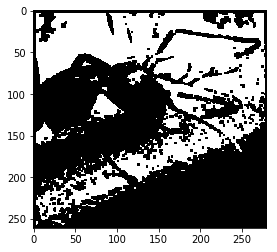

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지를 그레이 스케일로 리드
img = cv2.imread('./data/ants/swiss-army-ant.jpg', 0)
# 2치화 이미지로 변환
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# 이미지를 압축
kernel = np.ones((3,3), np.uint8)
img_el = cv2.erode(bin_img, kernel, iterations=1)
plt.imshow(img_el, cmap='gray')

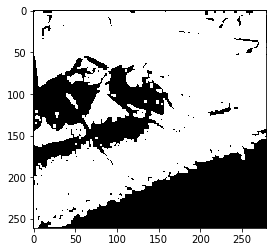

In [6]:
# 이미지를 해동
img_dl = cv2.dilate(bin_img, kernel, iterations=1)
plt.imshow(img_dl, cmap='gray')

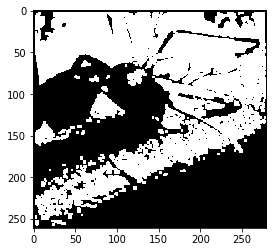

In [7]:
# 이미지를 오픈
img_op = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
plt.imshow(img_op, cmap='gray')

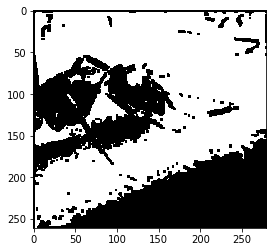

In [8]:
# 이미지를 클로즈
img_cl = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(img_cl, cmap='gray')

#### 히스토그램의 작성

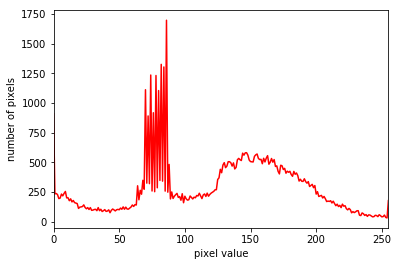

In [9]:
# 히스토그램의 작성
hist_gr, bins = np.histogram(img.ravel(), 256, [0,256])

# 히스토그램의 플로트
plt.xlim(0, 255)
plt.plot(hist_gr, '-r')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()

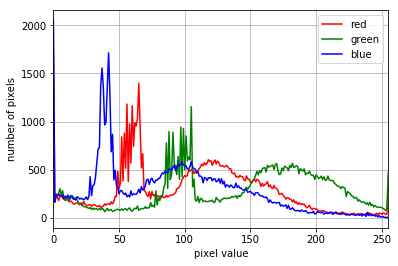

In [10]:
# 연습문제5
# 이미지를 컬러로 리드
img = cv2.imread('./data/ants/swiss-army-ant.jpg')

# RGB히스토그램을 작성
b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
hist_r, bins = np.histogram(r.ravel(), 256, [0,256])
hist_g, bins = np.histogram(g.ravel(), 256, [0,256])
hist_b, bins = np.histogram(b.ravel(), 256, [0,256])

# RGB히스토그램을 플로트
plt.xlim(0, 255)
plt.plot(hist_r, '-r', label='red')
plt.plot(hist_g, '-g', label='green')
plt.plot(hist_b, '-b', label='blue')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.legend()
plt.grid()
plt.show()

#### PCA에 의한 차원압축

In [11]:
# 연습문제6
# PCA를 로드
from sklearn.decomposition import PCA

# 주성분을 누적기여율80%까지 추출
pca = PCA(0.80)
pixels_pca = pca.fit_transform(pixels_df)

# 주성분을 확인
print(pca.n_components_)

# 차원압축한 데이터 세트의 사이즈를 확인
print(pixels_pca.shape)

65
(397, 65)


In [12]:
# PCA적용후의 설명변수와 목적변수를 결합
img_set_pca = pd.concat([pd.DataFrame(pixels_pca), labels_df], axis=1)
img_set_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,label
0,8.585932,-2.592704,1.296475,-0.270453,1.362006,-1.552697,-1.112306,-0.823676,0.730632,0.517815,...,-0.717115,-0.392132,-0.452940,0.170282,0.083957,-0.227805,-0.098932,-0.030707,-0.464957,0
1,31.880076,-6.093543,6.490104,8.356649,3.687303,-5.482400,-1.098567,2.470296,1.352513,0.514062,...,1.410570,0.039913,-0.730414,1.393114,0.829098,1.859050,1.778975,-0.940773,-1.131724,0
2,42.004818,-2.950135,-8.028556,-8.161433,-1.800311,6.361601,4.497587,-3.424305,6.002184,-3.423000,...,0.422420,-1.205339,-0.207441,-1.047376,-1.888064,0.338827,-0.047465,0.613203,-0.561086,0
3,-3.303601,4.567248,-5.000806,-1.761876,0.740168,5.260692,0.151167,-0.634079,1.015606,-2.544271,...,-0.629686,-0.237305,0.345499,-0.012991,-0.329349,-0.114332,-0.864171,-0.046132,-0.995686,0
4,11.635159,1.743388,-0.714645,0.065259,-0.623635,3.251193,2.580930,0.577941,-2.747210,-0.128650,...,-0.028143,-0.591124,-0.249288,0.193581,-0.718916,-0.538968,1.195285,1.557111,0.033498,0


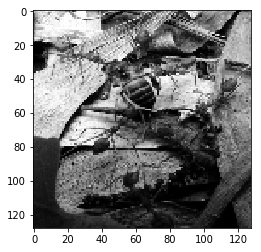

In [13]:
# 원래의 이미지를 플로트
plt.imshow(np.array(pixels_df)[99].reshape(128, 128), cmap='gray')

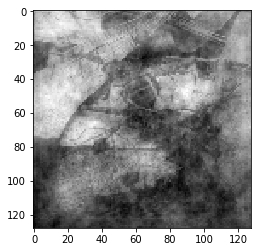

In [14]:
# 압축한 이미지를 플로트
pixels_low = pca.inverse_transform(pixels_pca)
plt.imshow(pixels_low[99].reshape(128, 128), cmap='gray')

#### t-SNE에 의한 차원 압축

In [15]:
from sklearn.manifold import TSNE

# 특징량을 2축 추출
tsne = TSNE(n_components=2)
pixels_tsne = tsne.fit_transform(pixels_df)

# 차원수를 확인
print(pixels_df.shape) # 압축전
print(pixels_tsne.shape) # 압축후

# t-SNE적용후의 설명변수와 목적변수를 결합
img_set_tsne = pd.concat([pd.DataFrame(pixels_tsne), labels_df], axis=1)
img_set_tsne.head()

(397, 16384)
(397, 2)


,0,1,label
0,3.247417,1.567976,0
1,8.683852,3.326018,0
2,10.260580,4.560802,0
3,-3.147284,0.069943,0
4,4.108634,3.655192,0


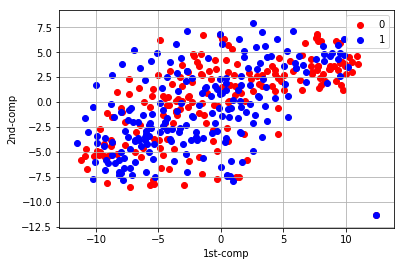

In [16]:
# 0을 플로트
img_set_tsne_0 = img_set_tsne[img_set_tsne['label'] == 0]
img_set_tsne_0 = img_set_tsne_0.drop('label', axis=1)
plt.scatter(img_set_tsne_0[0], img_set_tsne_0[1], c='red', label=0)
# 1을 플로트
img_set_tsne_1 = img_set_tsne[img_set_tsne['label'] == 1]
img_set_tsne_1 = img_set_tsne_1.drop('label', axis=1)
plt.scatter(img_set_tsne_1[0], img_set_tsne_1[1], c='blue', label=1)

plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.legend()
plt.grid()
plt.show()